In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

from models.ClusterFold import KlusterFoldCrossValidation

In [16]:
def plotter(A, b, title):
    """
    Used for plotting of feature matrix and associated labels
    """
    plt.scatter(A[:, 0], A[:, 1], c=b)
    plt.title(title)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()

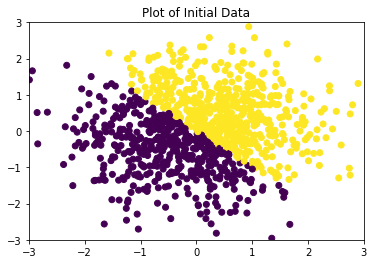

In [18]:
n = 1000
X = np.random.randn(n, 2)
y = np.ones(n)
y[X[:, 0] + X[:, 1] < 0] = 0

plotter(X, y, 'Plot of Initial Data')

1. We create some feature data `X` and target data `y` (see above)
2. The `KlusterFoldCrossValidation` object is then initialised with this data and the denominator for the test size fraction
>* test_div=5 ~ test_size=0.2
>* test_div=10 ~ test_size=0.1;
>* ... 
3. A train test split is then performed on the originally passed data. The Train / Test output matches that of `sklearn` and internal parameters are also updated.  

In [20]:
kfcv = KlusterFoldCrossValidation(X, y, test_div=5)
X_train, X_test, y_train, y_test = kfcv.train_test_split(test_label=0)

The differences in the training and test sets can now be visualised, showing the removal of the test cluster
Note that after performing the initial `train_test_split`, the training and testing data can also be accessed using the object attributes. 

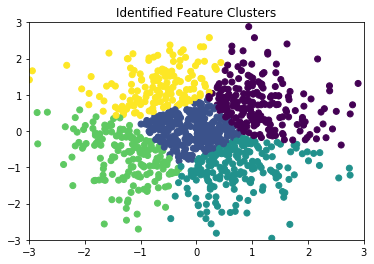

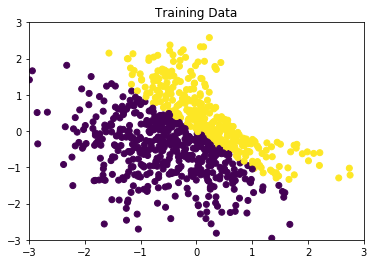

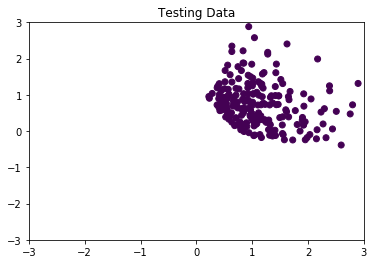

In [22]:
# Plotting with external values
plotter(X, kfcv.k_assignments, 'Identified Feature Clusters')
plotter(X_train, y_train, 'Training Data')
plotter(X_test, y_test, 'Testing Data')

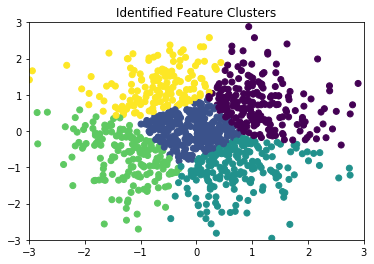

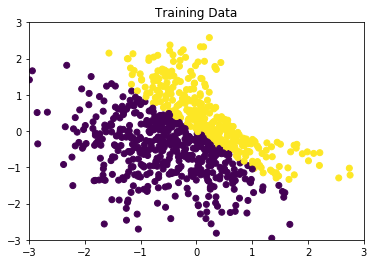

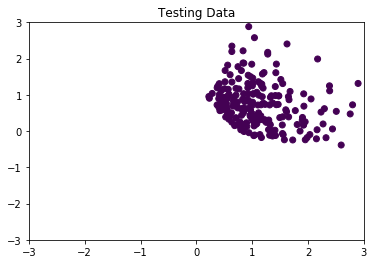

In [24]:
# plotting with internal attributes
plotter(kfcv.X, kfcv.k_assignments, 'Identified Feature Clusters')
plotter(kfcv.X_train, kfcv.y_train, 'Training Data')
plotter(kfcv.X_test, kfcv.y_test, 'Testing Data')

Now that the data has been separated into `Train` and `Test` clusters, the cross cluster validation can now be performed.

The `cross_cluster_validate` method performs a second clustering of the `X_Train` data and then proceeds via a "one held out" cluster cross validation.
As with the `sklearn` implementation, the method takes a passed ML model / estimator and the metric of choice, along with the number of clusters to divide `Train` into.
The output of this method is a dictionary with keys `Train` and `cv`, with the values being the respective model values for each iteration of cross validation.

In [25]:
knr = KNeighborsRegressor()
cv_results = kfcv.cross_cluster_validate(estimator=knr, metric=mean_absolute_error, cv=10)
print(cv_results)

{'train': [0.01955922865013774, 0.022427035330261136, 0.019525801952580194, 0.014835164835164836, 0.016296296296296295, 0.01601123595505618, 0.01849405548216644, 0.014551083591331266, 0.019204389574759947, 0.02065997130559541], 'cv': [0.0, 0.0030534351145038168, 0.0, 0.24444444444444444, 0.17383177570093458, 0.10285714285714286, 0.0, 0.13823529411764707, 0.0037735849056603765, 0.011764705882352941]}


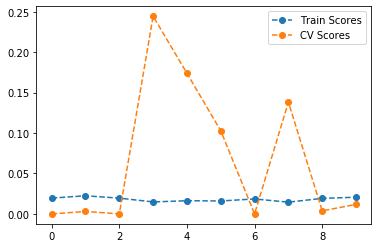

In [26]:
plt.plot(cv_results['train'], '--o', label='Train Scores')
plt.plot(cv_results['cv'], '--o', label='CV Scores')
plt.legend()
plt.show()
